In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_excel('Parameter3_The proportion of female representatives in the parliament.xlsx')

In [3]:
print(df.head())

                                         Series Name     Series Code  \
0  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   
1  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   
2  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   
3  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   
4  Proportion of seats held by women in national ...  SG.GEN.PARL.ZS   

     Country Name Country Code  2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  \
0  United Kingdom          GBR      22.000000      22.307692      22.461538   
1         Turkiye          TUR       9.107468      14.181818      14.181818   
2          Sweden          SWE      44.985673      44.699140      44.699140   
3          France          FRA      18.890815      18.890815      26.863085   
4         Germany          DEU      32.797428      32.903226      32.903226   

   2013 [YR2013]  2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  \
0      22.46

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    8 non-null      object 
 1   Series Code    6 non-null      object 
 2   Country Name   6 non-null      object 
 3   Country Code   6 non-null      object 
 4   2010 [YR2010]  6 non-null      float64
 5   2011 [YR2011]  6 non-null      float64
 6   2012 [YR2012]  6 non-null      float64
 7   2013 [YR2013]  6 non-null      float64
 8   2014 [YR2014]  6 non-null      float64
 9   2015 [YR2015]  6 non-null      float64
 10  2016 [YR2016]  6 non-null      float64
 11  2017 [YR2017]  6 non-null      float64
 12  2018 [YR2018]  6 non-null      float64
 13  2019 [YR2019]  6 non-null      float64
 14  2020 [YR2020]  6 non-null      float64
dtypes: float64(11), object(4)
memory usage: 1.4+ KB
None


In [5]:
print(df.describe())

       2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  2013 [YR2013]  \
count       6.000000       6.000000       6.000000       6.000000   
mean       28.074675      28.941560      29.962579      30.640517   
std        13.768402      12.364060      11.103870      11.387285   
min         9.107468      14.181818      14.181818      14.416058   
25%        19.668111      19.745034      23.561925      23.561925   
50%        27.398714      27.605459      29.883155      31.656582   
75%        38.699357      38.725806      37.225806      38.112520   
max        44.985673      44.699140      44.699140      44.985673   

       2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  \
count       6.000000       6.000000       6.000000       6.000000   
mean       30.502862      31.299995      31.333222      32.644548   
std        11.343051      10.116420      10.109195      10.012115   
min        14.416058      14.909091      14.909091      14.571949   
25%        23.503999      26.9735

In [6]:
print("Dataset loaded and initial features examined.")

Dataset loaded and initial features examined.


In [7]:
missing_values=df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Series Name      3
Series Code      5
Country Name     5
Country Code     5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
dtype: int64


In [8]:
#Drop
df.dropna(inplace=True)

In [9]:
duplicate_count=df.duplicated().sum()
print("Duplicate records:", duplicate_count)

Duplicate records: 0


In [10]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].fillna(df[column].mean())
print("Missing values were filled with the mean.") 

Missing values were filled with the mean.


In [11]:
missing_values_after = df.isnull().sum()
print("Missing values:\n", missing_values_after)

Missing values:
 Series Name      0
Series Code      0
Country Name     0
Country Code     0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
dtype: int64


In [12]:
print("Checked after filling in missing values.")

Checked after filling in missing values.


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country Name'] = le.fit_transform(df['Country Name'])
print("Categorical variable 'Country Name' was converted with tag encoding.")

Categorical variable 'Country Name' was converted with tag encoding.


In [14]:
df = pd.get_dummies(df, columns=['Series Name'])
print("Categorical variable 'Series Name' was converted with one-hot encoding.")

Categorical variable 'Series Name' was converted with one-hot encoding.


In [15]:
df.to_excel('processed_data.xlsx', index=False)
print("Processed dataset saved as 'processed_data.xlsx'.")

Processed dataset saved as 'processed_data.xlsx'.


In [16]:
print("Categorical variables are coded.")

Categorical variables are coded.


In [17]:
df = pd.read_excel('processed_data.xlsx')
#Numeric columns
numeric_features = ['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', 
                    '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', 
                    '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']

In [18]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [19]:
print("Numerical specifications are standardized.")

Numerical specifications are standardized.


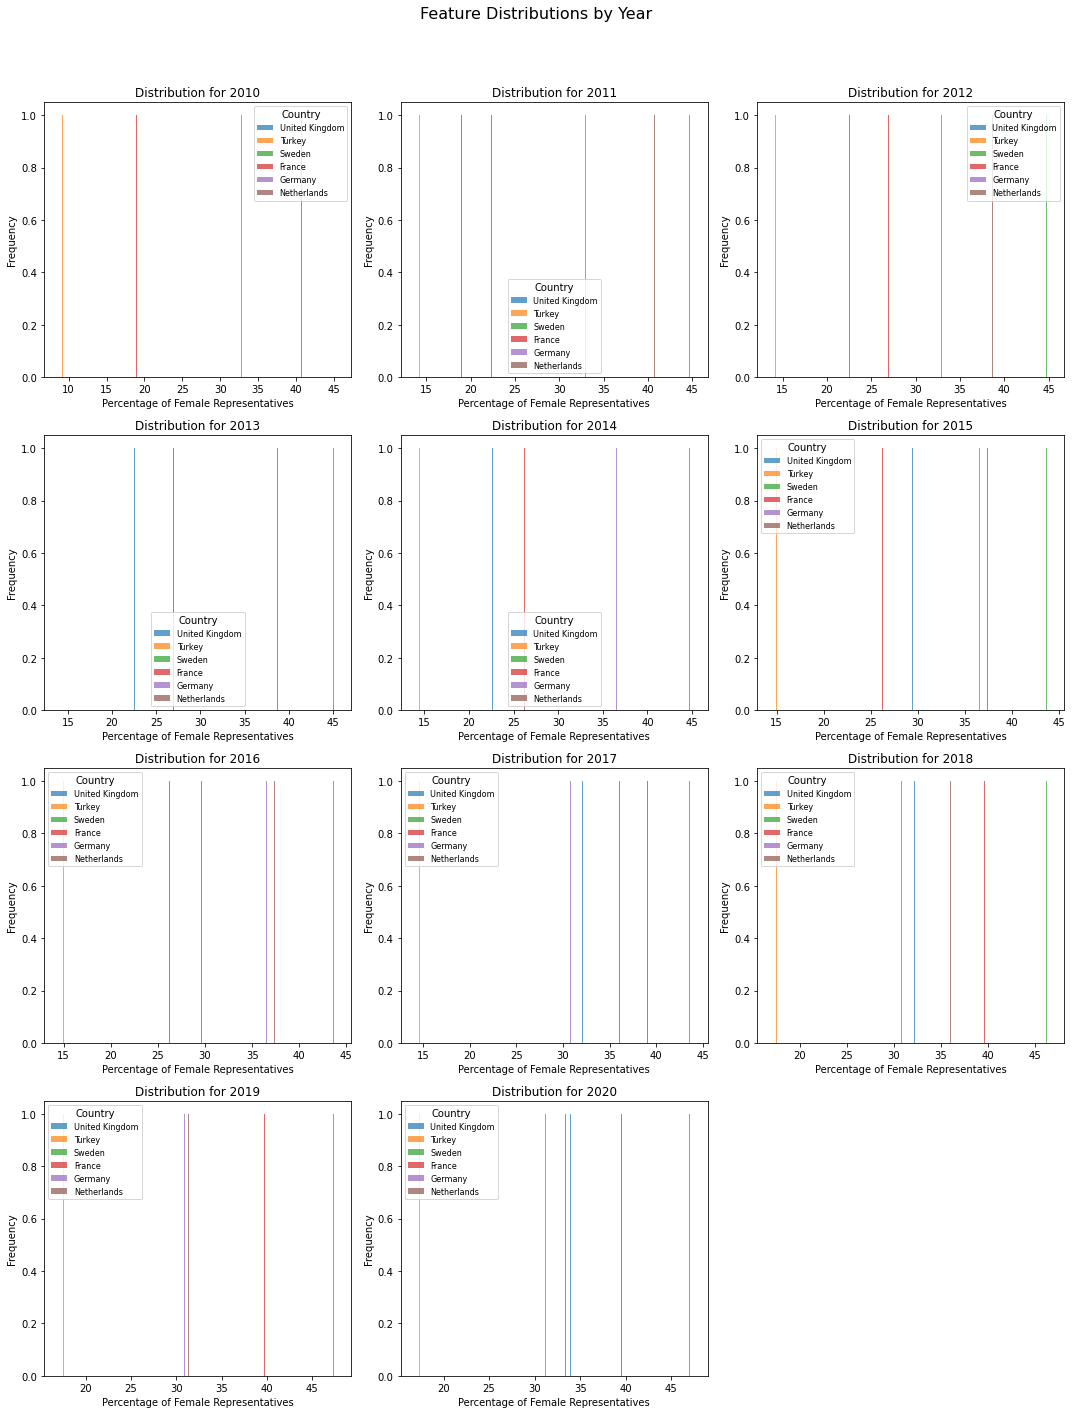

In [20]:
# Histogram
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Country Name": ["United Kingdom", "Turkey", "Sweden", "France", "Germany", "Netherlands"],
    "2010": [22, 9.107468124, 44.98567335, 18.89081456, 32.79742765, 40.66666667],
    "2011": [22.30769231, 14.18181818, 44.6991404, 18.89081456, 32.90322581, 40.66666667],
    "2012": [22.46153846, 14.18181818, 44.6991404, 26.86308492, 32.90322581, 38.66666667],
    "2013": [22.46153846, 14.41605839, 44.98567335, 26.86308492, 36.45007924, 38.66666667],
    "2014": [22.61538462, 14.41605839, 44.6991404, 26.16984402, 36.45007924, 38.66666667],
    "2015": [29.38461538, 14.90909091, 43.5530086, 26.16984402, 36.45007924, 37.33333333],
    "2016": [29.58397535, 14.90909091, 43.5530086, 26.16984402, 36.45007924, 37.33333333],
    "2017": [32, 14.571949, 43.5530086, 38.99480069, 30.74753173, 36],
    "2018": [32.15384615, 17.44966443, 46.13180516, 39.58333333, 30.74753173, 36],
    "2019": [32, 17.44966443, 47.27793696, 39.68804159, 30.88857546, 31.33333333],
    "2020": [33.84615385, 17.31748727, 46.99140401, 39.51473137, 31.17066291, 33.33333333],
}

df = pd.DataFrame(data)

df_melted = df.melt(id_vars="Country Name", var_name="Year", value_name="Percentage")

years = df_melted["Year"].unique()
countries = df["Country Name"].unique()
colors = plt.cm.tab10(range(len(countries)))

plt.figure(figsize=(15, 20))

for i, year in enumerate(years, start=1):
    plt.subplot(4, 3, i)
    year_data = df_melted[df_melted["Year"] == year]
    for country, color in zip(countries, colors):
        country_data = year_data[year_data["Country Name"] == country]
        plt.hist(
            country_data["Percentage"],
            bins=10,
            alpha=0.7,
            label=country,
            color=color
        )
    plt.title(f'Distribution for {year}', fontsize=12)
    plt.xlabel('Percentage of Female Representatives', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.legend(title="Country", fontsize=8)
    plt.tight_layout()

plt.suptitle('Feature Distributions by Year', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

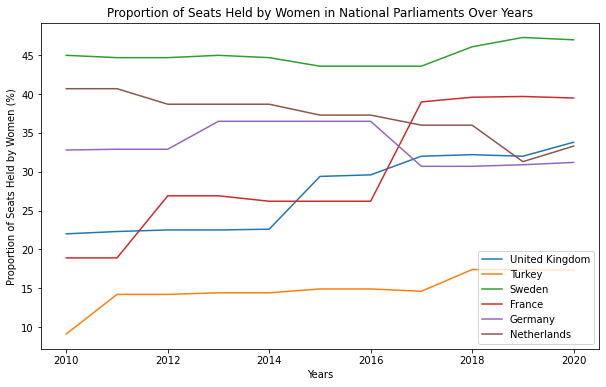

In [21]:
# Data Visualization
#LineChart
years = list(range(2010, 2021))
uk = [22, 22.3, 22.5, 22.5, 22.6, 29.4, 29.6, 32, 32.2, 32, 33.8]
turkey = [9.1, 14.2, 14.2, 14.4, 14.4, 14.9, 14.9, 14.6, 17.4, 17.4, 17.3]
sweden = [45, 44.7, 44.7, 45, 44.7, 43.6, 43.6, 43.6, 46.1, 47.3, 47]
france = [18.9, 18.9, 26.9, 26.9, 26.2, 26.2, 26.2, 39, 39.6, 39.7, 39.5]
germany = [32.8, 32.9, 32.9, 36.5, 36.5, 36.5, 36.5, 30.7, 30.7, 30.9, 31.2]
netherlands = [40.7, 40.7, 38.7, 38.7, 38.7, 37.3, 37.3, 36, 36, 31.3, 33.3]

plt.figure(figsize=(10, 6))
plt.plot(years, uk, label='United Kingdom')
plt.plot(years, turkey, label='Turkey')
plt.plot(years, sweden, label='Sweden')
plt.plot(years, france, label='France')
plt.plot(years, germany, label='Germany')
plt.plot(years, netherlands, label='Netherlands')
plt.xlabel('Years')
plt.ylabel('Proportion of Seats Held by Women (%)')
plt.title('Proportion of Seats Held by Women in National Parliaments Over Years')
plt.legend()
plt.show()

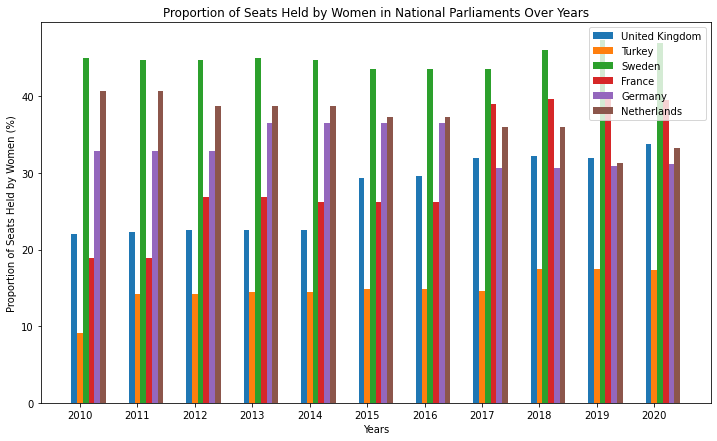

In [22]:
#BarChart
years = list(range(2010, 2021))
countries = ['United Kingdom', 'Turkey', 'Sweden', 'France', 'Germany', 'Netherlands']
data = [
    [22, 22.3, 22.5, 22.5, 22.6, 29.4, 29.6, 32, 32.2, 32, 33.8],
    [9.1, 14.2, 14.2, 14.4, 14.4, 14.9, 14.9, 14.6, 17.4, 17.4, 17.3],
    [45, 44.7, 44.7, 45, 44.7, 43.6, 43.6, 43.6, 46.1, 47.3, 47],
    [18.9, 18.9, 26.9, 26.9, 26.2, 26.2, 26.2, 39, 39.6, 39.7, 39.5],
    [32.8, 32.9, 32.9, 36.5, 36.5, 36.5, 36.5, 30.7, 30.7, 30.9, 31.2],
    [40.7, 40.7, 38.7, 38.7, 38.7, 37.3, 37.3, 36, 36, 31.3, 33.3]
]

bar_width = 0.1
index = np.arange(len(years))

plt.figure(figsize=(12, 7))

for i in range(len(countries)):
    plt.bar(index + i * bar_width, data[i], bar_width, label=countries[i])

plt.xlabel('Years')
plt.ylabel('Proportion of Seats Held by Women (%)')
plt.title('Proportion of Seats Held by Women in National Parliaments Over Years')
plt.xticks(index + bar_width, years)
plt.legend()
plt.show()

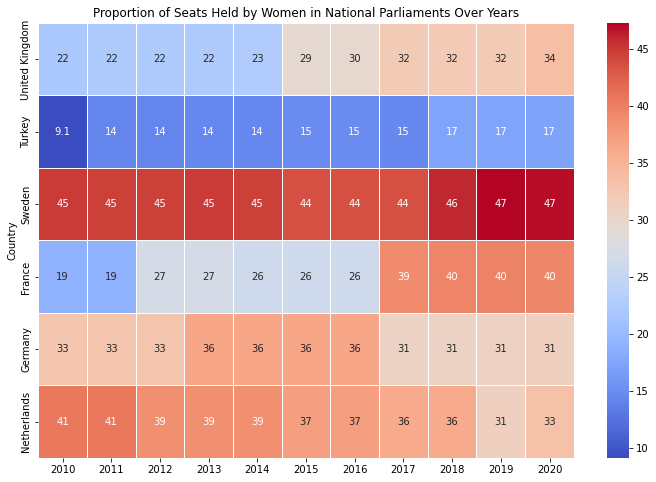

In [23]:
#Heatmap
data = {
    'Country': ['United Kingdom', 'Turkey', 'Sweden', 'France', 'Germany', 'Netherlands'],
    '2010': [22, 9.1, 45, 18.9, 32.8, 40.7],
    '2011': [22.3, 14.2, 44.7, 18.9, 32.9, 40.7],
    '2012': [22.5, 14.2, 44.7, 26.9, 32.9, 38.7],
    '2013': [22.5, 14.4, 45, 26.9, 36.5, 38.7],
    '2014': [22.6, 14.4, 44.7, 26.2, 36.5, 38.7],
    '2015': [29.4, 14.9, 43.6, 26.2, 36.5, 37.3],
    '2016': [29.6, 14.9, 43.6, 26.2, 36.5, 37.3],
    '2017': [32, 14.6, 43.6, 39, 30.7, 36],
    '2018': [32.2, 17.4, 46.1, 39.6, 30.7, 36],
    '2019': [32, 17.4, 47.3, 39.7, 30.9, 31.3],
    '2020': [33.8, 17.3, 47, 39.5, 31.2, 33.3]
}

df = pd.DataFrame(data).set_index('Country')
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Proportion of Seats Held by Women in National Parliaments Over Years')
plt.show()

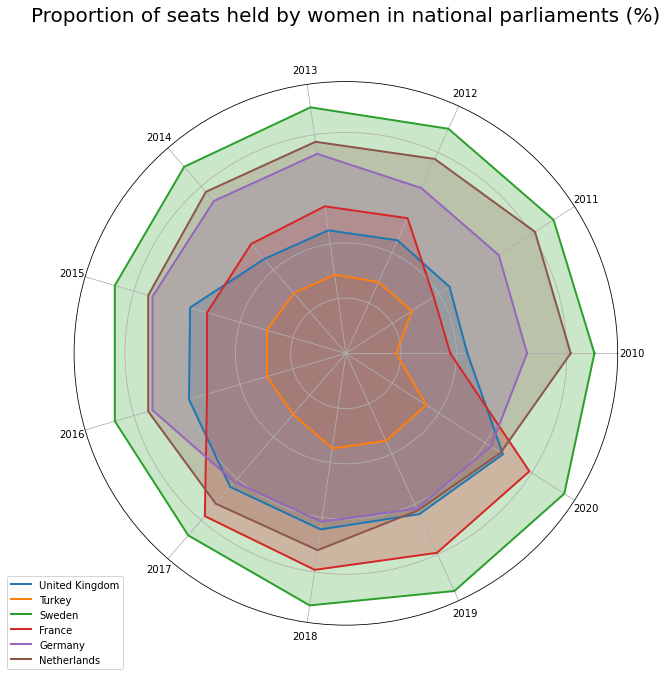

In [24]:
#RadarChart
categories = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
N = len(categories)

values_uk = [22, 22.3, 22.5, 22.5, 22.6, 29.4, 29.6, 32, 32.2, 32, 33.8]
values_turkey = [9.1, 14.2, 14.2, 14.4, 14.4, 14.9, 14.9, 14.6, 17.4, 17.4, 17.3]
values_sweden = [45, 44.7, 44.7, 45, 44.7, 43.6, 43.6, 43.6, 46.1, 47.3, 47]
values_france = [18.9, 18.9, 26.9, 26.9, 26.2, 26.2, 26.2, 39, 39.6, 39.7, 39.5]
values_germany = [32.8, 32.9, 32.9, 36.5, 36.5, 36.5, 36.5, 30.8, 30.8, 30.9, 31.2]
values_netherlands = [40.7, 40.7, 38.7, 38.7, 38.7, 37.3, 37.3, 36, 36, 31.3, 33.3]

def plot_radar(categories, values, title, labels):
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    for i, (value, label) in enumerate(zip(values, labels)):
        stats = value + value[:1]
        ax.plot(angles, stats, linewidth=2, linestyle='solid', label=label)
        ax.fill(angles, stats, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    plt.title(title, size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    plt.show()

values = [values_uk, values_turkey, values_sweden, values_france, values_germany, values_netherlands]
labels = ['United Kingdom', 'Turkey', 'Sweden', 'France', 'Germany', 'Netherlands']

plot_radar(categories, values, 'Proportion of seats held by women in national parliaments (%)', labels)

In [25]:
# Merging Datasets
parametre1 = pd.read_csv('Parameter1_Women_s-labor-force-participation-rate.csv')
parametre3 = pd.read_csv('Parameter3_The-proportion-of-female-representatives-in-the-parliament.csv')


parametre1_long = pd.melt(parametre1, 
                          id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                          var_name='Year', 
                          value_name='Labor Force Participation Rate')
parametre3_long = pd.melt(parametre3, 
                          id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                          var_name='Year', 
                          value_name='Female Representatives in Parliament')


parametre1_long['Year'] = parametre1_long['Year'].str.extract(r'(\d{4})')
parametre3_long['Year'] = parametre3_long['Year'].str.extract(r'(\d{4})')


parametre1_long = parametre1_long[['Country Name', 'Year', 'Labor Force Participation Rate']]
parametre3_long = parametre3_long[['Country Name', 'Year', 'Female Representatives in Parliament']]


merged_data = pd.merge(parametre1_long, parametre3_long, on=['Country Name', 'Year'], how='inner')

print(merged_data.head())

  Country Name  Year  Labor Force Participation Rate  \
0      Turkiye  2010                          27.611   
1       Sweden  2010                          67.107   
2  Netherlands  2010                          58.706   
3      Germany  2010                          52.727   
4       France  2010                          51.368   

   Female Representatives in Parliament  
0                              9.107468  
1                             44.985673  
2                             40.666667  
3                             32.797428  
4                             18.890815  


In [26]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample


print("Missing values:\n", merged_data.isnull().sum())


merged_data['Labor Force Participation Rate'] = merged_data['Labor Force Participation Rate'].fillna(
    merged_data['Labor Force Participation Rate'].mean()
)
merged_data['Female Representatives in Parliament'] = merged_data['Female Representatives in Parliament'].fillna(
    merged_data['Female Representatives in Parliament'].mean()
)


merged_data = merged_data.dropna(subset=['Country Name'])


print("Missing values (after correction):\n", merged_data.isnull().sum())


merged_data['Representation Level'] = merged_data['Female Representatives in Parliament'].apply(
    lambda x: 'High' if x > 30 else 'Low'
)


high_class = merged_data[merged_data['Representation Level'] == 'High']
low_class = merged_data[merged_data['Representation Level'] == 'Low']

low_class_upsampled = resample(
    low_class,
    replace=True,
    n_samples=len(high_class),
    random_state=42
)

merged_data_balanced = pd.concat([high_class, low_class_upsampled])


X = merged_data_balanced[['Labor Force Participation Rate', 'Female Representatives in Parliament']]
y = merged_data_balanced['Representation Level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


best_k = 0
best_accuracy = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K={k}: Accuracy={accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


print("\nBest K value:", best_k)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Testing):\n", classification_report(y_test, y_pred_test))

Missing values:
 Country Name                            275
Year                                      0
Labor Force Participation Rate          275
Female Representatives in Parliament    275
dtype: int64
Missing values (after correction):
 Country Name                            0
Year                                    0
Labor Force Participation Rate          0
Female Representatives in Parliament    0
dtype: int64
K=1: Accuracy=1.0
K=2: Accuracy=1.0
K=3: Accuracy=1.0
K=4: Accuracy=1.0
K=5: Accuracy=0.96
K=6: Accuracy=0.96
K=7: Accuracy=0.96
K=8: Accuracy=0.96
K=9: Accuracy=0.96
K=10: Accuracy=0.96

Best K value: 1
Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report (Testing):
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        15
         Low       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.

Index(['Country Name', 'Series Name_parliament', 'Series Code_parliament',
       'Country Code', 'Year',
       'Proportion of seats held by women in national parliaments (%)',
       'Series Name_labor', 'Series Code_labor',
       'Labor force participation rate, female (%)'],
      dtype='object')
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        63
         low       1.00      1.00      1.00         2
      medium       1.00      1.00      1.00         4

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Accuracy: 1.0


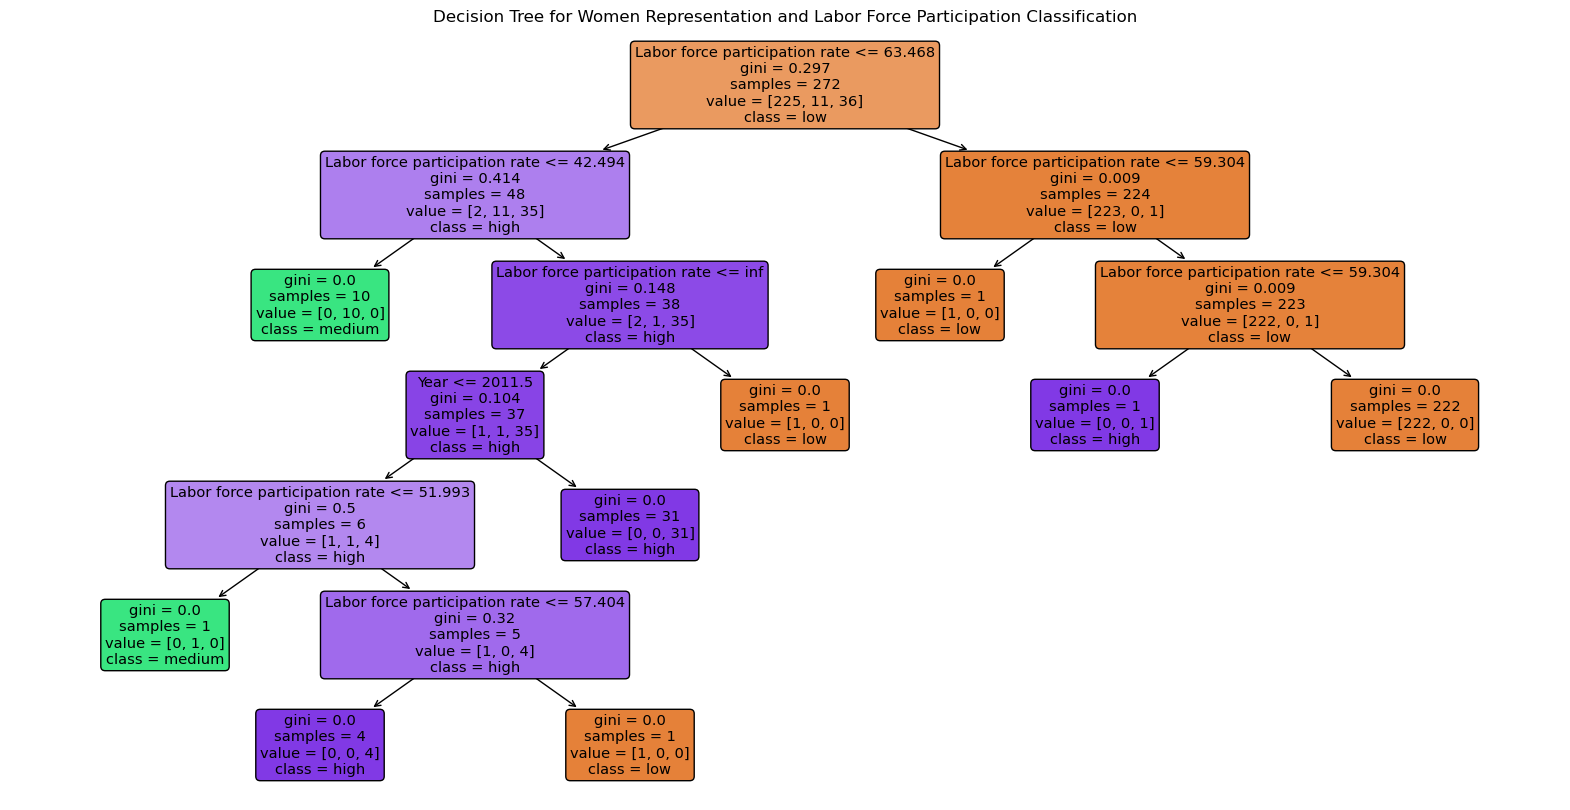

In [1]:
# Machine Learning Models
# Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Loading datasets (replace with the actual file paths of your datasets)
parliament_data = pd.read_csv('Parameter3_The-proportion-of-female-representatives-in-the-parliament.csv')
labor_data = pd.read_csv('Parameter1_Women_s-labor-force-participation-rate.csv')

# Reshaping the parliament data using melt
parliament_data = parliament_data.melt(id_vars=['Country Name', 'Series Name', 'Series Code', 'Country Code'],
                 value_vars=['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
                             '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
                             '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
                 var_name='Year', 
                 value_name='Proportion of seats held by women in national parliaments (%)')

# Reshaping the labor force data using melt
labor_data = labor_data.melt(id_vars=['Country Name', 'Series Name', 'Series Code', 'Country Code'],
                 value_vars=['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
                             '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
                             '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
                 var_name='Year', 
                 value_name='Labor force participation rate, female (%)')

# Converting Year to integer for both datasets
parliament_data['Year'] = parliament_data['Year'].str.extract(r'(\d{4})').astype(int)
labor_data['Year'] = labor_data['Year'].str.extract(r'(\d{4})').astype(int)

# Merging both datasets on common columns like 'Country Name', 'Year', and 'Country Code'
merged_data = pd.merge(parliament_data, labor_data, 
                       on=['Country Name', 'Year', 'Country Code'], 
                       suffixes=('_parliament', '_labor'))

# Inspecting columns after the merge to ensure correct naming
print(merged_data.columns)

# Classify the proportion of seats into low, medium, high based on parliament data
def classify_parliament_ratio(ratio):
    if ratio < 20:
        return 'low'
    elif 20 <= ratio < 40:
        return 'medium'
    else:
        return 'high'

# Adding a classification column for the proportion of seats held by women
# Updated the column name based on the actual data
merged_data['Class'] = merged_data['Proportion of seats held by women in national parliaments (%)'].apply(classify_parliament_ratio)

# Define features and target
features = merged_data[['Year', 'Labor force participation rate, female (%)']]
target = merged_data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualization
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['Year', 'Labor force participation rate'], class_names=['low', 'medium', 'high'], rounded=True)
plt.title('Decision Tree for Women Representation and Labor Force Participation Classification')
plt.show()



Columns: Index(['Country Name', 'Series Name_parliament', 'Series Code_parliament',
       'Country Code', 'Year',
       'Proportion of seats held by women in national parliaments (%)',
       'Series Name_labor', 'Series Code_labor',
       'Labor force participation rate, female (%)'],
      dtype='object')
Mean Absolute Error (MAE): 5.617883151671562
Root Mean Squared Error (RMSE): 6.550069841932801


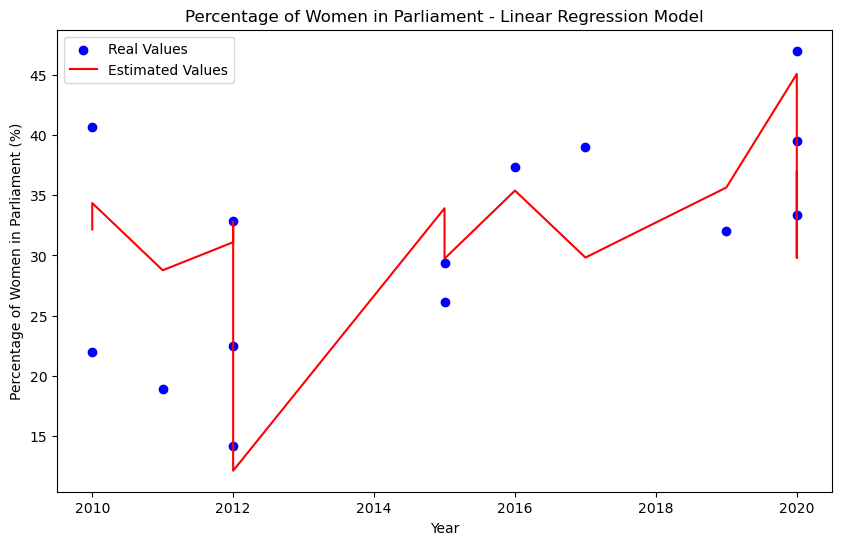

In [5]:
# Linear Regression Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


parliament_data = pd.read_csv('Parameter3_The-proportion-of-female-representatives-in-the-parliament.csv')
labor_data = pd.read_csv('Parameter1_Women_s-labor-force-participation-rate.csv')


parliament_data = parliament_data.melt(id_vars=['Country Name', 'Series Name', 'Series Code', 'Country Code'],
                                       value_vars=['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
                                                   '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
                                                   '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
                                       var_name='Year',
                                       value_name='Proportion of seats held by women in national parliaments (%)')

labor_data = labor_data.melt(id_vars=['Country Name', 'Series Name', 'Series Code', 'Country Code'],
                             value_vars=['2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]',
                                         '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
                                         '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
                             var_name='Year',
                             value_name='Labor force participation rate, female (%)')


parliament_data['Year'] = parliament_data['Year'].str.extract(r'(\d{4})').astype(int)
labor_data['Year'] = labor_data['Year'].str.extract(r'(\d{4})').astype(int)


merged_data = pd.merge(parliament_data, labor_data,
                       on=['Country Name', 'Year', 'Country Code'],
                       suffixes=('_parliament', '_labor'))

merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.dropna(inplace=True)

print("Columns:", merged_data.columns)

X = merged_data[['Year', 'Labor force participation rate, female (%)']]
y = merged_data['Proportion of seats held by women in national parliaments (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

sorted_idx = np.argsort(X_test['Year'].values.flatten())
X_test_sorted = X_test['Year'].values.flatten()[sorted_idx]
y_test_sorted = y_test.values.flatten()[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.figure(figsize=(10, 6))
plt.scatter(X_test_sorted, y_test_sorted, label='Real Values', color='blue')
plt.plot(X_test_sorted, y_pred_sorted, 'r-', label='Estimated Values')
plt.title('Percentage of Women in Parliament - Linear Regression Model')
plt.xlabel('Year')
plt.ylabel('Percentage of Women in Parliament (%)')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 3.277406885811757
Root Mean Squared Error (RMSE): 3.9315319334724723
R² Score: 0.8347271998716711


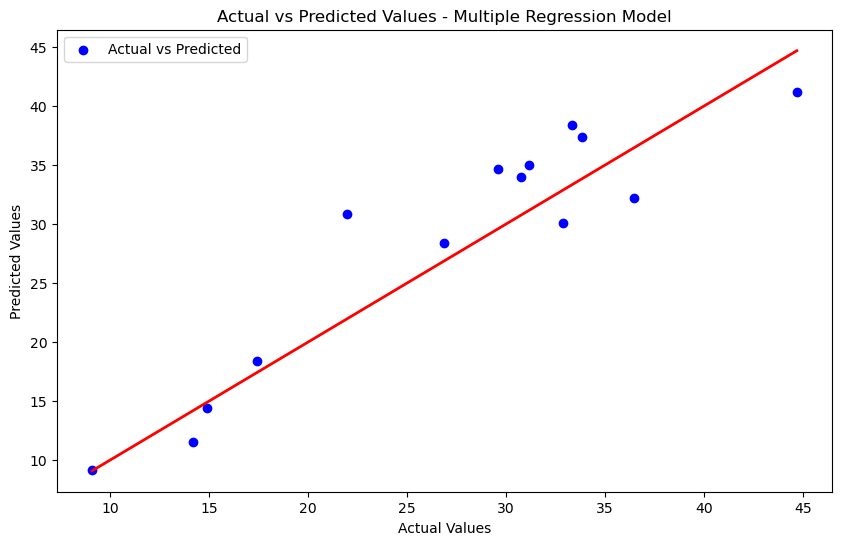

In [7]:
# Multiple Regression Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


df1 = pd.read_csv('Parameter1_Women_s-labor-force-participation-rate.csv')
df2 = pd.read_csv('Parameter3_The-proportion-of-female-representatives-in-the-parliament.csv')

merged_df = pd.merge(df1, df2, on="Country Code", suffixes=('_employment', '_parliament'))

merged_df.drop(['Series Name_employment', 'Series Code_employment', 'Series Name_parliament', 'Series Code_parliament'], axis=1, inplace=True)
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(inplace=True)

employment_cols = [col for col in merged_df.columns if '_employment' in col]
parliament_cols = [col for col in merged_df.columns if '_parliament' in col]

data_employment = merged_df.melt(id_vars=['Country Code'],
                                 value_vars=employment_cols,
                                 var_name='Year',
                                 value_name='Employment')

data_parliament = merged_df.melt(id_vars=['Country Code'],
                                 value_vars=parliament_cols,
                                 var_name='Year',
                                 value_name='Parliament')

data_employment['Year'] = data_employment['Year'].str.extract(r'(\d{4})')
data_employment = data_employment.dropna(subset=['Year', 'Employment'])
data_employment['Year'] = data_employment['Year'].astype(int)

data_parliament['Year'] = data_parliament['Year'].str.extract(r'(\d{4})')
data_parliament = data_parliament.dropna(subset=['Year', 'Parliament'])
data_parliament['Year'] = data_parliament['Year'].astype(int)

data = pd.merge(data_employment, data_parliament, on=['Country Code', 'Year'])

data.dropna(inplace=True)

X = data[['Employment', 'Year']]
y = data['Parliament']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_score = model.score(X_test, y_test)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2_score)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Actual vs Predicted', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)
plt.title('Actual vs Predicted Values - Multiple Regression Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()